In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imresize

In [2]:
#load_n = 50 # from 280
X_train = np.load('data/X_train.npy')#[0:load_n]
y = np.genfromtxt('data/y_1.csv', delimiter='\n')#[0:load_n]
#data_test = np.load('data/X_test.npy')

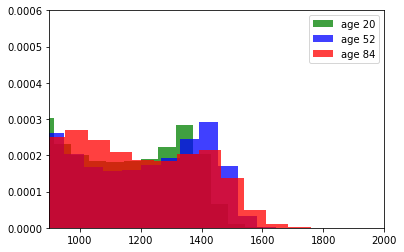

In [16]:
# Let's take a look at the values
# 0 has age 20, 9 has 52, 3 has age  84,
plt.hist(X_train[0], 50, normed=1, facecolor='green', alpha=0.75, label='age 20')
plt.hist(X_train[9], 50, normed=1, facecolor='blue', alpha=0.75, label='age 52')
plt.hist(X_train[3], 50, normed=1, facecolor='red', alpha=0.75, label='age 84')
plt.ylim([0, 0.0006])
plt.xlim([900, 2000]) # nearly no values >2000
plt.legend()
plt.show()

In [73]:
stats = []
for i in range(0, len(X_train)):
    d = X_train[i]
    stats.append([
        np.mean(d),
        np.std(d),
        np.var(d),
        np.max(d),
        np.count_nonzero(d),
        
        # make bins
        ((1 < d) & (d <= 300)).sum(),
        ((300 < d) & (d <= 600)).sum(),
        ((600 < d) & (d <= 900)).sum(),
        ((900 < d) & (d <= 1200)).sum(),
        ((1200 < d) & (d <= 1600)).sum(),
    ])

vlog = np.vectorize(lambda x: np.log(x + 1))
y_log = vlog(y)

In [74]:
# Correlations of statistics with age
print("mean:", np.corrcoef([x[0] for x in stats], y)[0][1])
print("std:", np.corrcoef([x[1] for x in stats], y)[0][1])
print("var:", np.corrcoef([x[2] for x in stats], y)[0][1])
print("max:", np.corrcoef([x[3] for x in stats], y)[0][1])
print("non zero:", np.corrcoef([x[4] for x in stats], y)[0][1])
print()
print("1 ... 300:", np.corrcoef([x[5] for x in stats], y)[0][1])
print("300 ... 600:", np.corrcoef([x[6] for x in stats], y)[0][1])
print("600 ... 900:", np.corrcoef([x[7] for x in stats], y)[0][1])
print("900 ... 1200:", np.corrcoef([x[8] for x in stats], y)[0][1])
print("1200 ... 1600:", np.corrcoef([x[9] for x in stats], y)[0][1])

mean: -0.664581723448
std: 0.424272683807
var: 0.42574441758
max: 0.125388254806
non zero: 0.0655713119001

1 ... 300: 0.842089379749
300 ... 600: 0.754220017075
600 ... 900: -0.901096226242
900 ... 1200: 0.597727266538
1200 ... 1600: 0.294392132924


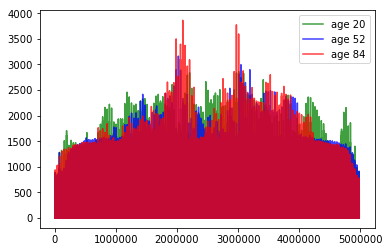

In [35]:
#np.save('data/X_train_sm.npy', X_train[:50])
#np.savetxt('data/y_1_log.csv', y_log, delimiter='\n')

plt.plot(list(range(0, len(X_train[0][672000 : -786000]))), X_train[0][672000 : -786000], color='green', alpha=0.75, label='age 20')
plt.plot(list(range(0, len(X_train[9][672000 : -786000]))), X_train[9][672000 : -786000], color='blue', alpha=0.75, label='age 52')
plt.plot(list(range(0, len(X_train[3][672000 : -786000]))), X_train[3][672000 : -786000], color='red', alpha=0.75, label='age 84')
plt.legend()
plt.show()

In [90]:
# For some slices (columns) through all rows compute std
l = 64
num_bins = int(len(X_train[0][672000 : -786000]) / l)
means = []
for i in range(0, len(X_train)):
    row = X_train[i][672000 : -786000]
    row = row[0 : num_bins*l]
    splits = np.split(row, num_bins)
    means.append(np.mean(splits, axis=1))

col_std = []
for col in np.array(means).T:
    col_std.append(np.std(col))

# Save the indexes of the columns where std=0 for the means
col_std = np.array(col_std)
list((col_std == 0))
zero_std_ind = np.where(col_std==0)[0]
np.savetxt('data/zero_std_ind_'+str(l)+'.csv', zero_std_ind, delimiter=',')

print(len(zero_std_ind), 'are zero of', len(col_std), ', used len:', l)

33917 are zero of 77890 , used len: 64


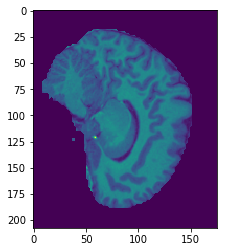

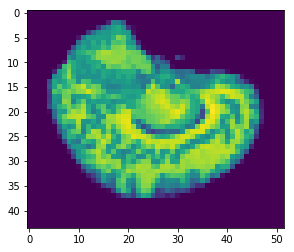

In [35]:
# Find out what the list of values was
# 0s at beginning: 672390 , 0s at end: 786303
# greatest common divider: 9, other common divider 3
# so the values may be rgb pixels, but probably
# divisors of len(row) = 6443008
# ... | 1024 | 1144 | 1408 | 1573 | 1664 | 1936 | 2048 | 2288 | 2816 | 3146 | 3328 | 3872 | 4096 | 4576 | 5632 | 6292 | 6656 | 7744 | 9152 | 11264 | 12584 | 13312 | 15488 | 18304 | 22528 | 25168 | 26624 | 30976 | 36608 | 45056 | 50336 | 53248 | 61952 | 73216 | 100672 | 123904 | 146432 | 201344 | 247808 | 292864 | 402688 | 495616 | 585728 | 805376 | 1610752 | 3221504 | 6443008 (78 divisors)
# => image has shape 208 * 176 * 176
divisors = "104 | 121 | 128 | 143 | 176 | 208 | 242 | 256 | 286 | 352 | 416 | 484 | 512 | 572 | 704 | 832 | 968 | 1024 | 1144 | 1408 | 1573 | 1664 | 1936 | 2048 | 2288 | 2816 | 3146 | 3328 | 3872 | 4096 | 4576 | 5632 | 6292 | 6656 | 7744 | 9152 | 11264 | 12584 | 13312 | 15488 | 18304 | 22528 | 25168 | 26624 | 30976 | 36608 | 45056 | 50336 | 53248 | 61952 | 73216 | 100672 | 123904 | 146432 | 201344".split(' | ')
row = X_train[0]
for d in divisors:
    break
    ll = int(d)    
    print(ll)
    hh = int(len(row)/ll)
    plt.imshow(np.split(row, hh))
    plt.show()
    
hh = 208 # height
images = np.split(X_train[0], 176)
for i in range(50, 52):
    break
    #row = X_train[0][i*(hh * 176) : (i+1) * (hh * 176)]
    image = np.split(images[i], hh)
    
    plt.imshow(imresize(image, 0.2))
    plt.show()
    
#print(len(images[0]) * (0.2)**2 * 90)
image = images[100]
plt.imshow(np.split(image, 208))
plt.show()

splits = np.split(image, 208 / 4 * 176)
image = np.mean(splits, axis=1)
#plt.imshow(np.split(image, 208))
#plt.show()

image = np.array(np.split(image, 208)).T
splits = np.split(image.flatten(), 208 / 4 * 176 / 4)
image = np.mean(splits, axis=1)
plt.imshow(np.split(image, 176 / 4))
plt.show()
"""
splits = np.split(image, 4) 
image = np.mean(splits, axis=0)
print(len(image))
image = np.split(image, 208/4)
plt.imshow(image)

#plt.imshow(imresize(image, (64, 44))) # 64 * 44 * 44
plt.show()
"""
print()
#(6443008 / 100000)**(1/3)


20.0


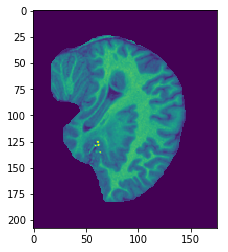

25.0


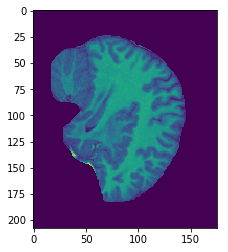

61.0


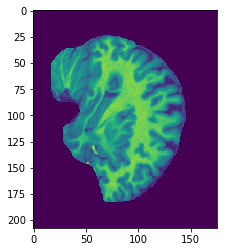

In [63]:
# Are the pictures normalized?
# The brain scans seem to start and stop at the exact same location for every scan

from sklearn.preprocessing import StandardScaler, Normalizer
sc = StandardScaler()
no = Normalizer()
for i, row in enumerate((X_train[:3])):
    images = np.split(row, 176)
    image = images[55] # maybe only the images 50:130 are interesting enough
    print(y[i])
    #print(np.mean(image))

    
    side_images = np.split(image, 208)
    #print(np.sum(side_images[-23:]))
    plt.imshow(side_images)
    plt.show()


In [75]:
# Try to extract more features

from sklearn.preprocessing import StandardScaler, Normalizer
sc = StandardScaler()
no = Normalizer()

bin_length = 62
num_bins = int(len(X_train[0]) / bin_length)
X_new = []
for i, row in enumerate((X_train[:3])):
    images = np.split(row, 176)[50:130]
    #np.array(images).flatten()
    row2 = row[0 : num_bins*bin_length] # crop last elements, they are probably 0 anyway
    splits = np.split(row2, num_bins)
    features = np.mean(splits, axis=1)
    
    splits = np.split(row2, bin_length)
    features2 = np.mean(splits, axis=0)
    X_new.append(np.concatenate((features, features2)))

print(len(X_new[0]))

207838


20.0


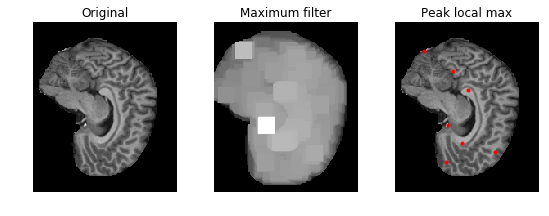

25.0


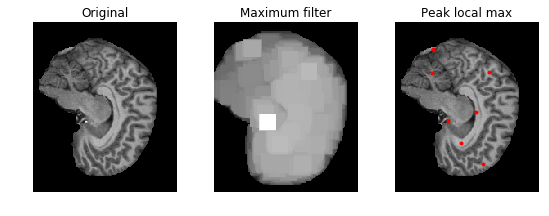

61.0


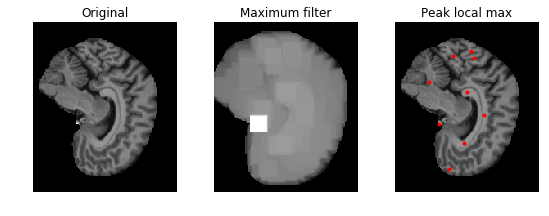

84.0


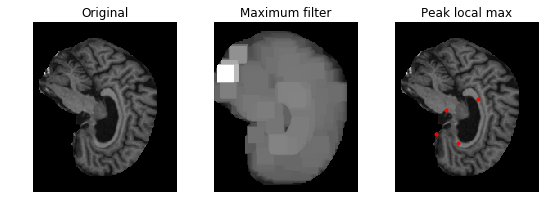

23.0


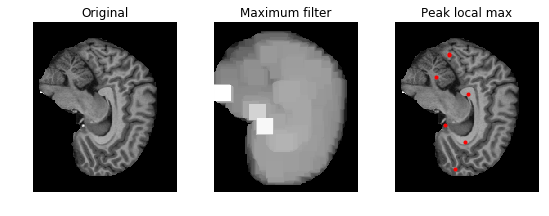

69.0


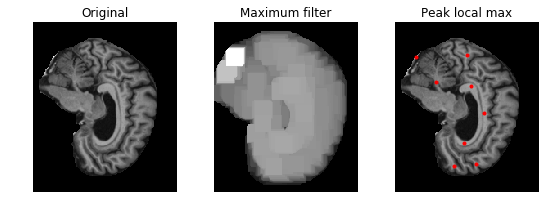

83.0


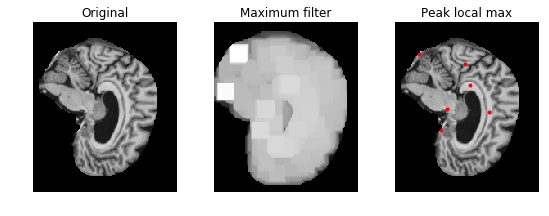

62.0


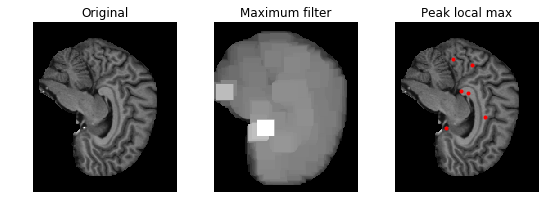

72.0


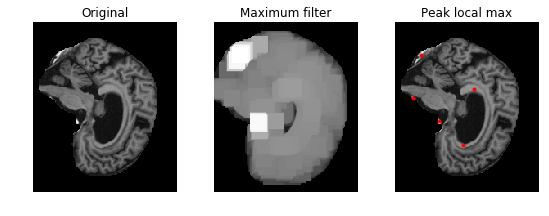

52.0


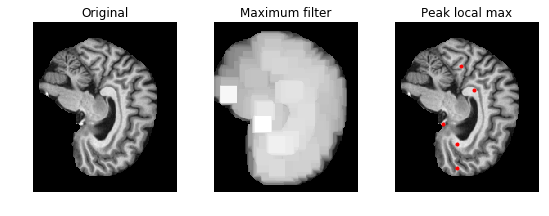

In [90]:
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage import data, img_as_float

for i, row in enumerate(X_train[:10]):
    print(y[i])
    images = np.split(row, 176)
    im = np.array(np.split(images[80], 208))
m
    image_max = ndi.maximum_filter(im, size=20, mode='constant')
    coordinates = peak_local_max(im, min_distance=20)

    # display results
    fig, axes = plt.subplots(1, 3, figsize=(8, 3), sharex=True, sharey=True,
                             subplot_kw={'adjustable': 'box-forced'})
    ax = axes.ravel()
    ax[0].imshow(im, cmap=plt.cm.gray)
    ax[0].axis('off')
    ax[0].set_title('Original')

    ax[1].imshow(image_max, cmap=plt.cm.gray)
    ax[1].axis('off')
    ax[1].set_title('Maximum filter')

    ax[2].imshow(im, cmap=plt.cm.gray)
    ax[2].autoscale(False)
    ax[2].plot(coordinates[:, 1], coordinates[:, 0], 'r.')
    ax[2].axis('off')
    ax[2].set_title('Peak local max')

    fig.tight_layout()

    plt.show()

In [ ]:
from sklearn.cluster import KMeans

#samples = random.sample(list(X_train), 3)
#for i, sample in enumerate(samples):
    #samples[i] = (np.histogram(sample, range=(1, 1800), bins=204)[0])
#    samples[i] = sample[1672390 : -786303]
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, n_jobs=-1, random_state=42)
#kmeans.fit(np.array(samples).T)
#kmeans.cluster_centers_
#len(samples[0])
face = X_train[3][1672390 : -786303]
asd = [face]
asd.append(X_train[4][1672390 : -786303])
#print(np.array(asd).T)
X = face.reshape((-1, 1))  # We need an (n_sample, n_feature) array
kmeans.fit(np.array(asd).T)
values = kmeans.cluster_centers_.squeeze()
labels = kmeans.labels_
values

In [ ]:
"""
plt.hist(samples[0], 10, normed=1, facecolor='green', alpha=0.75)
plt.show()
plt.plot(kmeans.cluster_centers_[0], list(range(0, len(kmeans.cluster_centers_[0]))), 'o')
plt.show()
kmeans.labels_
"""
i = 0
face = X_train[i][1672390 : -786303]

val = np.sort(values.T[i])
regular_values = np.linspace(0, 256, n_clusters + 1)
regular_labels = np.searchsorted(regular_values, face) - 1
regular_values = .5 * (regular_values[1:] + regular_values[:-1])  # mean
regular_face = np.choose(regular_labels.ravel(), regular_values, mode="clip")
regular_face.shape = face.shape
#plt.imshow(regular_face, cmap=plt.cm.gray, vmin=vmin, vmax=vmax)

# histogram
plt.figure(4, figsize=(3, 2.2))
plt.clf()
plt.axes([.01, .01, .98, .98])
plt.hist(X, bins=100, color='.5', edgecolor='.5')
plt.ylim([0, 100000])
plt.xlim([0, 1800])
#plt.yticks(())
#plt.xticks(regular_values)

for center_1, center_2 in zip(val[:-1], val[1:]):
    plt.axvline(.5 * (center_1 + center_2), color='b')

#for center_1, center_2 in zip(regular_values[:-1], regular_values[1:]):
#    plt.axvline(.5 * (center_1 + center_2), color='b', linestyle='--')

plt.show()

In [48]:
kmeans.cluster_centers_
edges = []
for center_1, center_2 in zip(kmeans.cluster_centers_[:-1], kmeans.cluster_centers_[1:]):
    edges.append(.5 * (center_1 + center_2))

ValueError: n_samples=1 should be >= n_clusters=2